# Model Comparison


In [1]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [2]:
#importing necessary libraries
import time
#importing necessary libraries
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB,GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold,cross_validate
from sklearn.metrics import make_scorer,roc_auc_score, roc_curve, auc, accuracy_score,f1_score,precision_score,recall_score,confusion_matrix
from scipy import interp
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from xgboost import XGBClassifier
import xgboost
import lightgbm as lgb

from IPython.display import display
pd.options.display.max_columns = None

from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


Using TensorFlow backend.


# Data Processing

In [3]:
#importing the data
#training_data = pd.read_csv('bio1.csv') 
training_data = pd.read_csv('processed_classification_data_montreal_pca.csv',low_memory=False) 

training_data.head()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,pca26,pca27,pca28,pca29,pca30,pca31,pca32,pca33,pca34,host_is_superhost
0,-0.474339,-0.474844,0.389883,-0.471864,0.185293,1.116366,0.414690,0.063444,-1.203412,0.699074,-0.063986,0.086385,-0.252392,-0.248272,-0.030587,-0.587326,0.135535,-0.320858,0.334783,0.145255,-0.036997,0.048747,-0.045505,-0.214200,0.179186,-0.062494,-0.022941,-0.047115,-0.001091,-0.003606,0.006182,-0.055095,-0.000116,-0.071183,0.002289,0
1,-0.674078,-0.025294,0.602587,0.180993,0.585290,-0.683450,-0.475963,0.361476,-0.196342,0.431648,-1.009008,0.092240,-0.252311,-0.204166,-0.082996,-0.526020,0.385506,-0.296933,0.366007,-0.001905,-0.031533,0.099835,-0.065345,-0.216041,0.232375,-0.067576,-0.017458,-0.032399,-0.011691,-0.001619,0.007858,-0.022524,-0.049704,-0.103367,0.019225,0
2,-0.954492,0.853418,-0.756602,0.523384,0.160506,0.034401,0.357726,0.805028,-0.347207,-0.205824,0.182438,0.158347,0.745091,-0.071641,0.001081,-0.432285,-0.081086,-0.180307,0.250225,0.166116,0.037690,0.002307,-0.109274,-0.113535,-0.018676,-0.059342,-0.011082,0.016078,-0.001783,-0.002740,-0.023663,-0.074266,0.004455,-0.086789,0.045459,1
3,-0.848249,-0.036345,-0.310128,0.352206,1.092834,-0.451777,0.632280,0.280157,-0.374359,0.064426,0.484660,0.576353,-0.329901,-0.110429,-0.005397,-0.411799,-0.192387,-0.140484,0.158154,0.282853,-0.030114,0.074417,-0.084751,-0.146881,0.155578,-0.033099,-0.002411,-0.053849,0.005864,0.009079,-0.012034,-0.160084,0.041781,-0.193927,0.061497,0
4,-0.721186,0.619287,0.169457,-0.370367,0.968512,0.145605,0.976594,-0.345198,0.019229,1.565775,0.585498,0.289668,-0.213695,-0.120285,0.037532,-0.180915,-0.266716,-0.265141,0.342741,-0.052178,0.006970,-0.054059,-0.086305,-0.105225,0.039258,-0.056074,-0.033911,-0.057164,0.005415,-0.018287,-0.029441,-0.032082,0.028960,-0.001740,0.019641,0


In [4]:

# training_data = training_data.loc[:, ~training_data.columns.str.contains('^Unnamed')]
# training_data.head()
# training_data.to_csv('processed_classification_data_montreal_pca_reduced.csv',header=True,index=False)


In [5]:
X = training_data.drop('host_is_superhost',axis=1).to_numpy()
y = training_data.host_is_superhost.to_numpy()

In [6]:
# from imblearn.over_sampling import SMOTE
# resampler = SMOTE(kind='svm', random_state=442)
# X, y = resampler.fit_resample(X, y)

In [7]:
# pd.Series(y).value_counts()
# X_train = X 
# y_train = y

results_data = pd.DataFrame()
pd.DataFrame({'var':[1,2,2]})
pd.Series()


,var
0,1
1,2
2,2


# MODELS

In [8]:
#Performs k fold cross validation with the specified classifer and returns all the necessary metrics
def cross_val_scores(classifier, clf, X, y):
    tprs = []
    plt.figure(figsize=(10, 10))
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 31)
    cv = 10
    k_fold = StratifiedKFold(n_splits = cv, shuffle = True,random_state=0)
    k_scores = []
    recall_scores = []
    precision_scores = []
    accuracy_scores = []
    aucs = []
    tprs = []
    f1_scores =[]
    
    
    for i, (train, test) in enumerate(k_fold.split(X, y)):
        clf.fit(X[train], y[train])
        probas_ = clf.predict_proba(X[test])
        k_scores.append(clf.score(X[test], y[test]))
        fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0       
        recall_scores.append(recall_score(y[test],clf.predict(X[test])))
        precision_scores.append(precision_score(y[test],clf.predict(X[test])))
        accuracy_scores.append(accuracy_score(y[test],clf.predict(X[test])))
        f1_scores.append(f1_score(y[test],clf.predict(X[test])))
    results_data[classifier] = aucs
    
        
    plt.plot([0, 1], [0, 1],'r--', label='No-skill', alpha=0.7)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='blue', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc))

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.15, label=r'$\pm$ 1 std. dev.')
    plt.title('ROC - '+str(classifier))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend()
    plt.show()
    
    print("%s Mean AUC: %0.2f (+/- %0.2f)" % (classifier,mean_auc, std_auc))

    mean_recall = np.array(recall_scores).mean()
    std_recall =  np.array(recall_scores).std()
    print("%s Recall: %0.2f (+/- %0.2f)" % (classifier,mean_recall, std_recall))

    mean_precision = np.array(precision_scores).mean()
    std_precision =  np.array(precision_scores).std()
    print("%s Precision: %0.2f (+/- %0.2f)" % (classifier, mean_precision, std_precision))

    mean_accuracy = np.array(accuracy_scores).mean()
    std_accuracy =  np.array(accuracy_scores).std()
    print("%s Accuracy: %0.2f (+/- %0.2f)" % (classifier, mean_accuracy, std_accuracy))
    
    mean_f1 = np.array(f1_scores).mean()
    std_f1 =  np.array(f1_scores).std()
    print("%s F1 : %0.2f (+/- %0.2f)" % (classifier, mean_f1 , std_f1))

    mean_cvaccuracy = np.array(k_scores).mean()
    std_cvaccuracy =  np.array(k_scores).std()
    print("%s Cross validation accuracy: %0.2f (+/- %0.2f)" % (classifier, mean_cvaccuracy, std_cvaccuracy))


# Logistic Regression

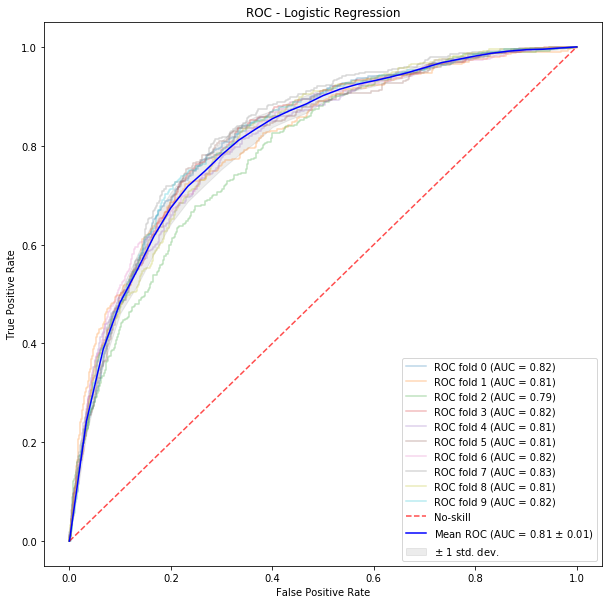

Logistic Regression Mean AUC: 0.81 (+/- 0.01)
Logistic Regression Recall: 0.25 (+/- 0.03)
Logistic Regression Precision: 0.63 (+/- 0.02)
Logistic Regression Accuracy: 0.83 (+/- 0.00)
Logistic Regression F1 : 0.35 (+/- 0.03)
Logistic Regression Cross validation accuracy: 0.83 (+/- 0.00)


In [9]:
clf = LogisticRegression(random_state=0)
cross_val_scores('Logistic Regression', clf, X, y)

# Naive Bayes

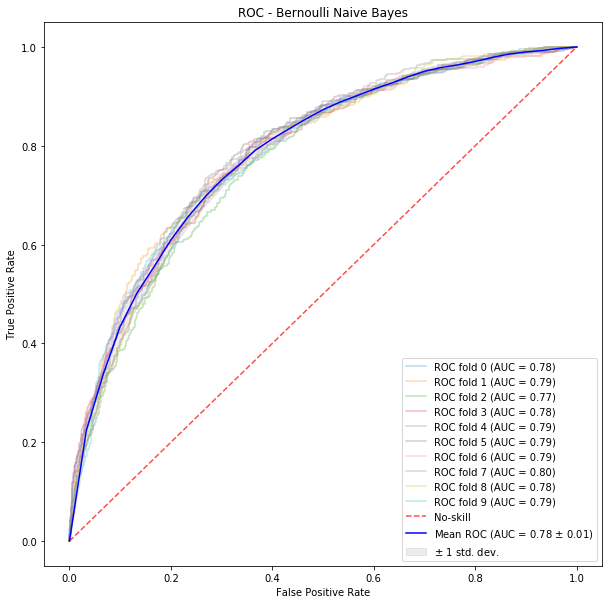

Bernoulli Naive Bayes Mean AUC: 0.78 (+/- 0.01)
Bernoulli Naive Bayes Recall: 0.27 (+/- 0.02)
Bernoulli Naive Bayes Precision: 0.57 (+/- 0.03)
Bernoulli Naive Bayes Accuracy: 0.82 (+/- 0.00)
Bernoulli Naive Bayes F1 : 0.37 (+/- 0.02)
Bernoulli Naive Bayes Cross validation accuracy: 0.82 (+/- 0.00)


In [10]:
clf = BernoulliNB()
cross_val_scores('Bernoulli Naive Bayes', clf, X, y)

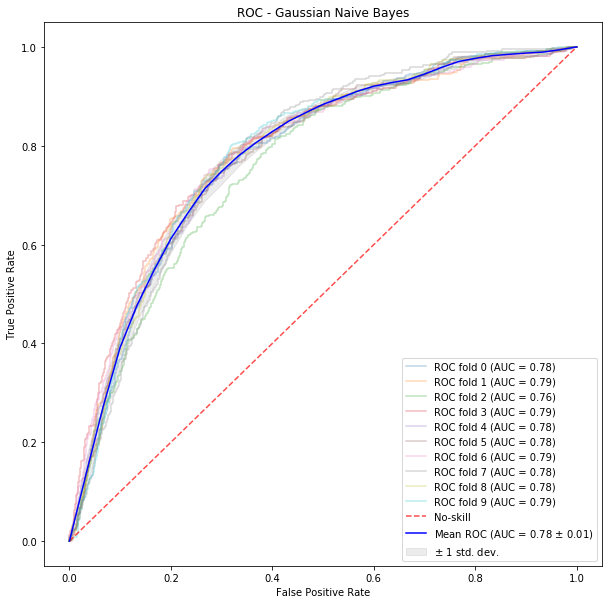

Gaussian Naive Bayes Mean AUC: 0.78 (+/- 0.01)
Gaussian Naive Bayes Recall: 0.68 (+/- 0.03)
Gaussian Naive Bayes Precision: 0.40 (+/- 0.01)
Gaussian Naive Bayes Accuracy: 0.74 (+/- 0.01)
Gaussian Naive Bayes F1 : 0.50 (+/- 0.01)
Gaussian Naive Bayes Cross validation accuracy: 0.74 (+/- 0.01)


In [11]:
clf = GaussianNB()
#clf.fit(X_train,y_train)
cross_val_scores('Gaussian Naive Bayes', clf, X, y)

# K-Nearest Neighbours

In [12]:
# param_dist = {"n_neighbors": np.arange(2,11)}
# scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score),'F1': make_scorer(f1_score),\
#            'Precision': make_scorer(precision_score),'Recall' : make_scorer(recall_score)}

# clf = KNeighborsClassifier(n_jobs = -1)

# grid_search = GridSearchCV(clf, param_grid =param_dist,scoring=scoring, refit='AUC',cv=10, iid=False,n_jobs = -1)

# start = time.time()
# best_model = grid_search.fit(X_train, y_train)
# print("GridSearchCV took %.2f seconds to find optimal parameters." % (time.time() - start))
# print('Optimal Parameters found : ', best_model.best_estimator_.get_params())
# print('AUC for optimal model : ',best_model.best_score_)
# results = grid_search.cv_results_
# pd.DataFrame(results)

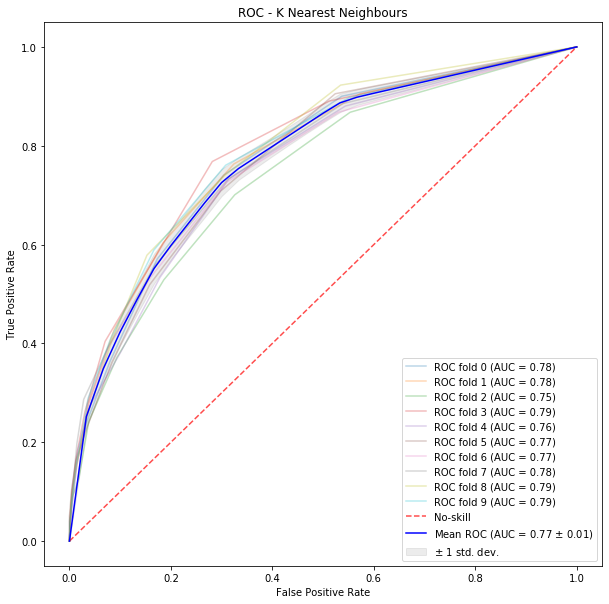

K Nearest Neighbours Mean AUC: 0.77 (+/- 0.01)
K Nearest Neighbours Recall: 0.26 (+/- 0.02)
K Nearest Neighbours Precision: 0.64 (+/- 0.03)
K Nearest Neighbours Accuracy: 0.83 (+/- 0.00)
K Nearest Neighbours F1 : 0.37 (+/- 0.02)
K Nearest Neighbours Cross validation accuracy: 0.83 (+/- 0.00)


In [13]:
#Use the parameters found by gridsearch

clf = KNeighborsClassifier(n_neighbors = 8)
#clf.fit(X_train,y_train)
cross_val_scores('K Nearest Neighbours', clf, X, y)


# Random Forest

In [14]:
# params = {"n_estimators": [100,1000], 
#               "criterion" : ['gini','entropy'],
#               "max_depth" : [None,2,10],
#               "min_samples_split" : [2,5]}

# scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score),'F1': make_scorer(f1_score),\
#            'Precision': make_scorer(precision_score),'Recall' : make_scorer(recall_score)}

# clf =RandomForestClassifier(random_state=0, n_jobs = -1)

# random_search = RandomizedSearchCV(clf, param_distributions = params, scoring=scoring, refit='AUC',cv=10, iid=False,n_jobs = -1,n_iter=8)

# start = time.time()
# best_model = random_search.fit(X_train, y_train)
# print("RandomizedSearchCV took %.2f seconds to find optimal parameters." % (time.time() - start))
# print('Optimal Parameters found : ', best_model.best_estimator_.get_params())
# print('AUC for optimal model : ',best_model.best_score_)
# results = random_search.cv_results_
# pd.DataFrame(results)

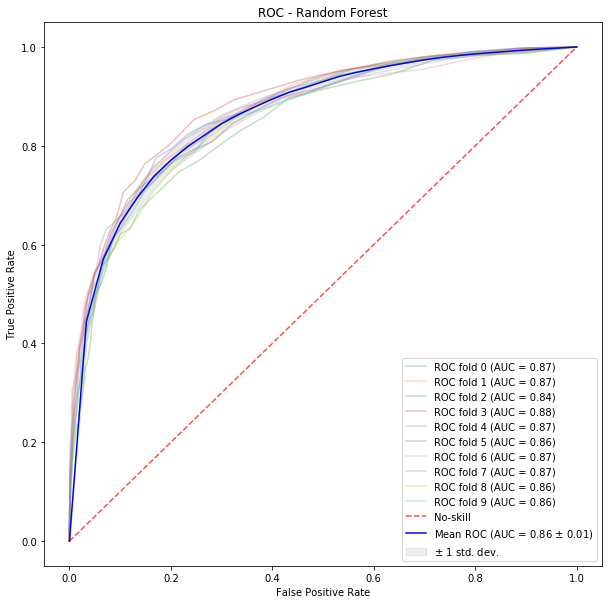

Random Forest Mean AUC: 0.86 (+/- 0.01)
Random Forest Recall: 0.38 (+/- 0.03)
Random Forest Precision: 0.79 (+/- 0.03)
Random Forest Accuracy: 0.86 (+/- 0.01)
Random Forest F1 : 0.52 (+/- 0.03)
Random Forest Cross validation accuracy: 0.86 (+/- 0.01)


In [15]:
clf = RandomForestClassifier(n_estimators=50, criterion='gini',min_samples_split=2,random_state=0, n_jobs = -1)
#clf.fit(X_train,y_train)
    
cross_val_scores('Random Forest', clf, X, y)

# Decision Tree

In [16]:
# params={ "max_depth" : [None,2,5,10],
#               "min_samples_split" : [2,3,4,5]}
# clf=DecisionTreeClassifier(random_state=0)


# scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score),'F1': make_scorer(f1_score),\
#            'Precision': make_scorer(precision_score),'Recall' : make_scorer(recall_score)}

# grid_search = GridSearchCV(clf, param_grid = params, scoring=scoring, refit='AUC',cv=10, iid=False,n_jobs = -1)

# start = time.time()
# best_model = grid_search.fit(X_train, y_train)
# print("GridSearchCV took %.2f seconds to find optimal parameters." % (time.time() - start))
# print('Optimal Parameters found : ', best_model.best_estimator_.get_params())
# print('AUC for optimal model : ',best_model.best_score_)
# results = grid_search.cv_results_
# pd.DataFrame(results)


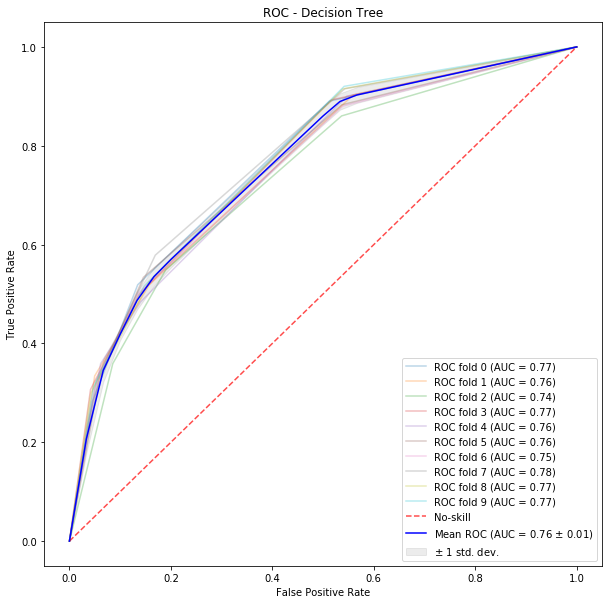

Decision Tree Mean AUC: 0.76 (+/- 0.01)
Decision Tree Recall: 0.32 (+/- 0.02)
Decision Tree Precision: 0.59 (+/- 0.04)
Decision Tree Accuracy: 0.83 (+/- 0.01)
Decision Tree F1 : 0.41 (+/- 0.02)
Decision Tree Cross validation accuracy: 0.83 (+/- 0.01)


In [17]:
clf = DecisionTreeClassifier(criterion='gini',min_samples_split=2,max_depth=2, random_state=0)
#clf.fit(X_train,y_train) 
cross_val_scores('Decision Tree', clf, X, y)

In [18]:
results_data.to_csv('results.csv', header = True, index= False)

# Support Vector Machine - SVM

In [19]:
 
# clf = SVC(kernel = 'rbf', probability = True,random_state=0)
# params = {'gamma': [0.1,0.01,0.001,0.0001], 'C': [1, 10, 100, 1000]}

# grid_search = GridSearchCV(clf, param_grid = params ,cv=10, n_jobs=-1, refit='roc_auc', iid=False)

# start = time.time()
# best_model = grid_search.fit(X_train, y_train)
# print("GridSearchCV took %.2f seconds to find optimal parameters." % (time.time() - start))
# print('Optimal Parameters found : ', best_model.best_estimator_.get_params())
# print('AUC for optimal model : ',best_model.best_score_)
# results = grid_search.cv_results_
# pd.DataFrame(results)


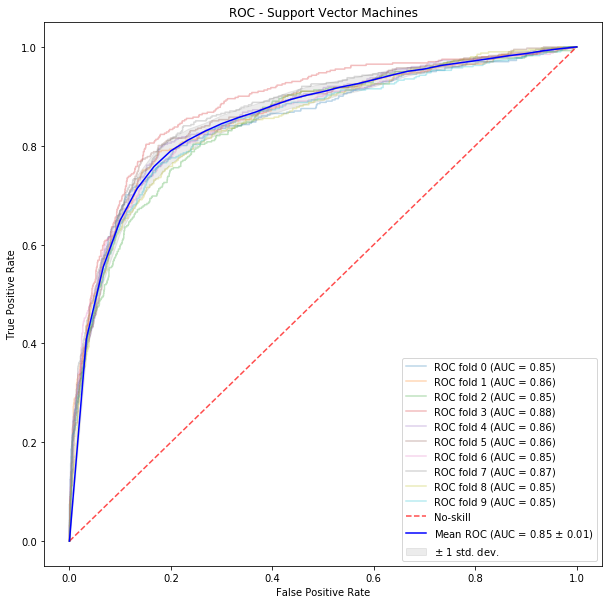

Support Vector Machines Mean AUC: 0.85 (+/- 0.01)
Support Vector Machines Recall: 0.41 (+/- 0.03)
Support Vector Machines Precision: 0.74 (+/- 0.02)
Support Vector Machines Accuracy: 0.86 (+/- 0.00)
Support Vector Machines F1 : 0.53 (+/- 0.03)
Support Vector Machines Cross validation accuracy: 0.86 (+/- 0.00)


In [20]:
clf = SVC(kernel = 'rbf', probability = True, C=10, gamma=0.1,random_state=0)
#clf.fit(X_train,y_train)
cross_val_scores('Support Vector Machines', clf, X, y)

# XGBoost

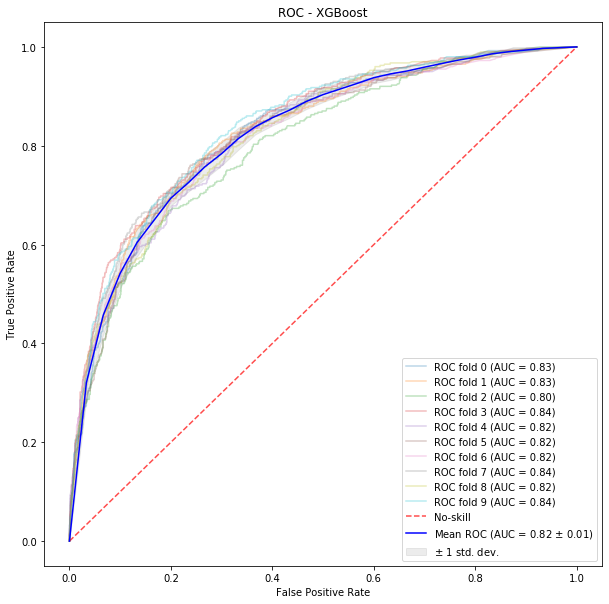

XGBoost Mean AUC: 0.82 (+/- 0.01)
XGBoost Recall: 0.30 (+/- 0.03)
XGBoost Precision: 0.70 (+/- 0.03)
XGBoost Accuracy: 0.84 (+/- 0.00)
XGBoost F1 : 0.42 (+/- 0.03)
XGBoost Cross validation accuracy: 0.84 (+/- 0.00)


In [21]:
model = xgboost.XGBClassifier( 
                      learning_rate=0.01,  
                      n_estimators=200)
cross_val_scores('XGBoost', model, X, y)

# LGBM


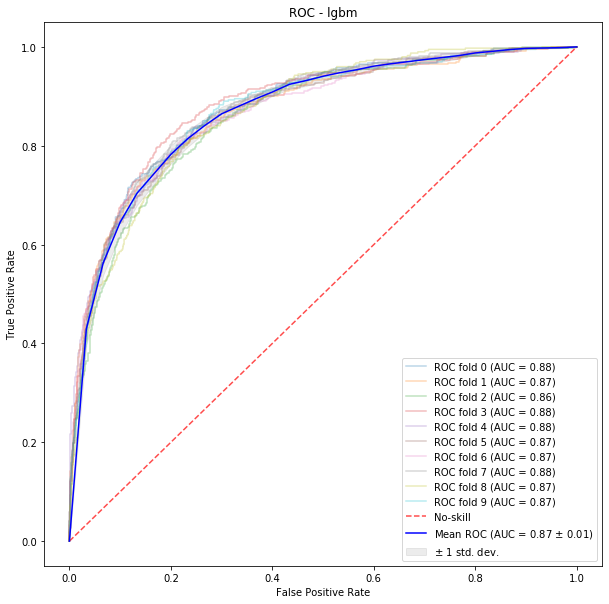

lgbm Mean AUC: 0.87 (+/- 0.01)
lgbm Recall: 0.44 (+/- 0.03)
lgbm Precision: 0.74 (+/- 0.03)
lgbm Accuracy: 0.87 (+/- 0.01)
lgbm F1 : 0.56 (+/- 0.03)
lgbm Cross validation accuracy: 0.87 (+/- 0.01)


In [23]:
gbm = lgb.LGBMClassifier(learning_rate = 0.08, n_estimators=50, silent=True)
cross_val_scores('lgbm', gbm, X, y)

In [24]:
results_data.to_csv('results.csv', header = True, index= False)

# Rule Based


In [25]:
from rulefit import RuleFit


scoring = {'AUC': make_scorer(roc_auc_score), 'Accuracy': make_scorer(accuracy_score),'F1': make_scorer(f1_score),
            'Precision': make_scorer(precision_score),'Recall' : make_scorer(recall_score)}
rf = RuleFit(memory_par=0.01, tree_size=4, tree_generator=None, max_rules=100,rfmode='classify',random_state=1) 
results_cross_val= pd.DataFrame(cross_validate(rf.fit(X, y), X, y, cv=10, scoring=scoring))

print(results_cross_val)


rules = pd.DataFrame(rf.get_rules())
rules = rules[rules.coef != 0].sort_values(by="support")
num_rules_rule=len(rules[rules.type=='rule'])
num_rules_linear=len(rules[rules.type=='linear'])
rules.head()

    fit_time  score_time  test_AUC  test_Accuracy   test_F1  test_Precision  \
0  37.974904    0.031245  0.653008       0.829384  0.457831        0.635983   
1  52.073494    0.031243  0.706719       0.897156  0.537313        0.673797   
2  82.563181    0.031244  0.724622       0.893365  0.588665        0.770335   
3  46.513480    0.035297  0.702036       0.828355  0.553086        0.666667   
4  63.381913    0.039948  0.709636       0.860123  0.562963        0.716981   
5  39.293246    0.031244  0.694702       0.816975  0.548009        0.684211   
6  29.311966    0.031243  0.674935       0.814604  0.516687        0.751799   
7  43.873170    0.031243  0.656161       0.836890  0.469136        0.723810   
8  66.514724    0.031246  0.619350       0.834045  0.379433        0.557292   
9  58.761612    0.046862  0.518939       0.867236  0.108280        0.197674   

   test_Recall  
0     0.357647  
1     0.446809  
2     0.476331  
3     0.472574  
4     0.463415  
5     0.457031  
6     0.393

,rule,type,coef,support,importance
87,feature_17 <= 0.012049436569213867 & feature_1...,rule,0.408257,0.016478,0.051973
65,feature_32 <= -0.03491618111729622 & feature_1...,rule,-0.463252,0.017508,0.060757
70,feature_0 <= -0.6913320422172546 & feature_21 ...,rule,0.213085,0.031926,0.037461
117,feature_0 <= -0.7739332914352417 & feature_28 ...,rule,-0.308736,0.031926,0.054277
88,feature_19 > -0.027964124456048012 & feature_0...,rule,-0.103722,0.039135,0.020113


In [26]:
mean_auc = np.array(results_cross_val['test_AUC']).mean()
std_auc =  np.array(results_cross_val['test_AUC']).std()
print("%s Cross AUC: %0.2f (+/- %0.2f)" % ('RuleFit', mean_auc, std_auc))

mean_recall = np.array(results_cross_val['test_Recall']).mean()
std_recall =  np.array(results_cross_val['test_Recall']).std()
print("%s Recall: %0.2f (+/- %0.2f)" % ('RuleFit',mean_recall, std_recall))

mean_precision = np.array(results_cross_val['test_Precision']).mean()
std_precision =  np.array(results_cross_val['test_Precision']).std()
print("%s Precision: %0.2f (+/- %0.2f)" % ('RuleFit', mean_precision, std_precision))

mean_accuracy = np.array(results_cross_val['test_Accuracy']).mean()
std_accuracy =  np.array(results_cross_val['test_Accuracy']).std()
print("%s Accuracy: %0.2f (+/- %0.2f)" % ('RuleFit', mean_accuracy, std_accuracy))

    
mean_f1 = np.array(results_cross_val['test_F1']).mean()
std_f1 =  np.array(results_cross_val['test_F1']).std()
print("%s F1 : %0.2f (+/- %0.2f)" % ('RuleFit', mean_f1 , std_f1))


#result['RuleFit']=


RuleFit Cross AUC: 0.67 (+/- 0.06)
RuleFit Recall: 0.38 (+/- 0.12)
RuleFit Precision: 0.64 (+/- 0.16)
RuleFit Accuracy: 0.85 (+/- 0.03)
RuleFit F1 : 0.47 (+/- 0.13)


In [27]:
results_cross_val['test_AUC']
df = pd.read_csv('results.csv')
df['Rule Based'] = results_cross_val['test_AUC']
df.to_csv('results.csv', header=True, index= False)